# MAP estimates


In [1]:
import os, sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import imagine as img
# IMAGINE extension package
import imagine_snrs as img_snrs
import shell

In [2]:
runs_list = ['uniform_field', 'simple_helical_field', 'BMF_field', 'CK_m0_field', 'CK_m1_field']
runs = {}

runs_dir = '../runs/'
for run in runs_list:
    run_dir = os.path.join(runs_dir, run)
    if not os.path.isfile(os.path.join(run_dir,'pipeline.pkl')):
        continue
    runs[run] = img.load_pipeline(run_dir)



------------------------------ 
 uniform_field 
------------------------------
B: 0.13173308497990457 uG
beta: 8.039136382976107 deg
gamma: -17.735187084940296 deg


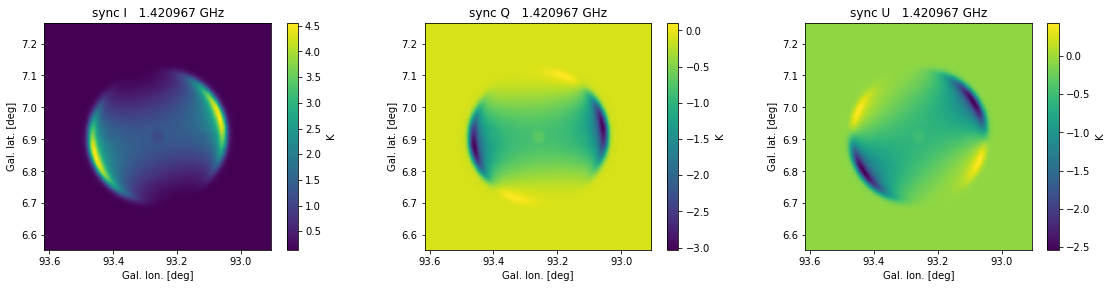

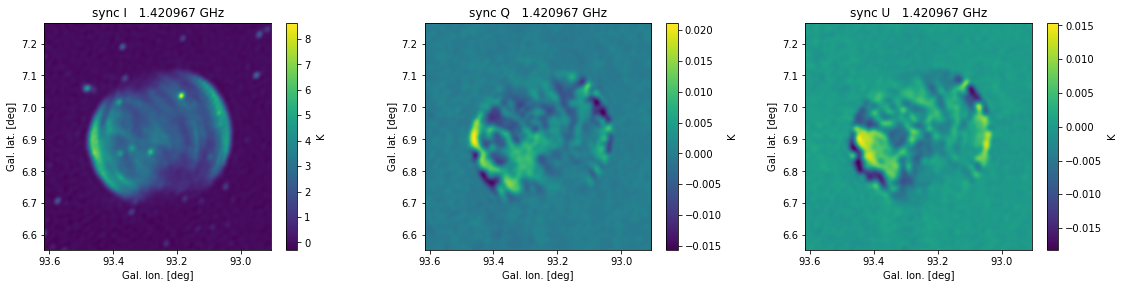



------------------------------ 
 simple_helical_field 
------------------------------
B: 0.13532023635864468 uG
alpha: 114.41601983280204 deg
beta: 24.870771031149907 deg
gamma: -6.094484546017982 deg
period: 37.46840078631121 pc


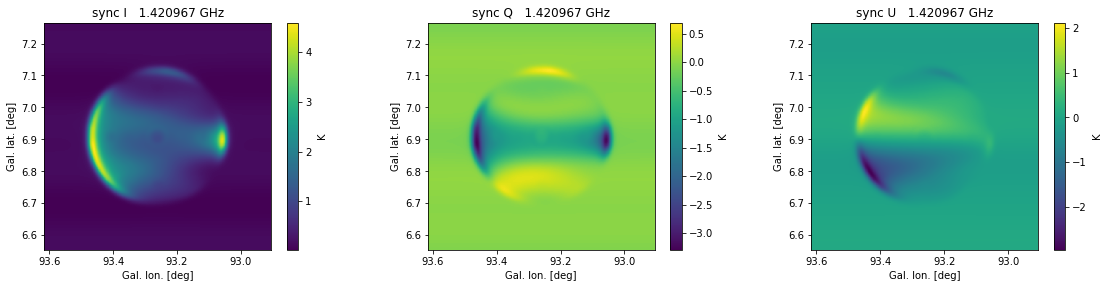

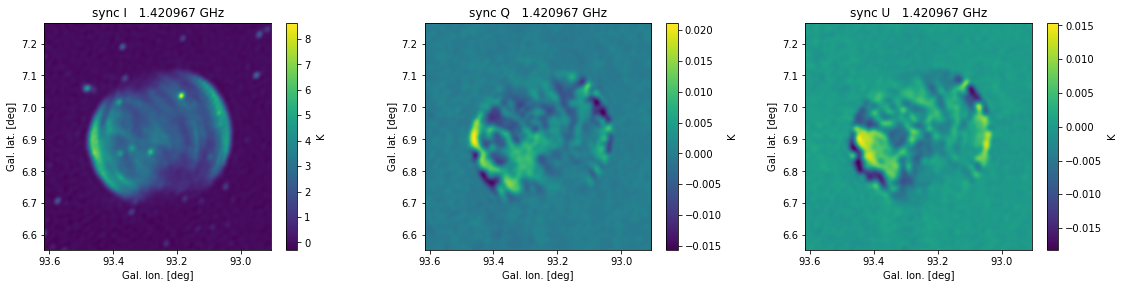



------------------------------ 
 BMF_field 
------------------------------
B: 0.21554215881790545 uG
period: 107.14611656646925 pc
x_shift: -44.39539933423425 pc
y_shift: -22.510491117035823 pc
alpha: -6.899667900227884 deg
beta: -5.798124284903912 deg


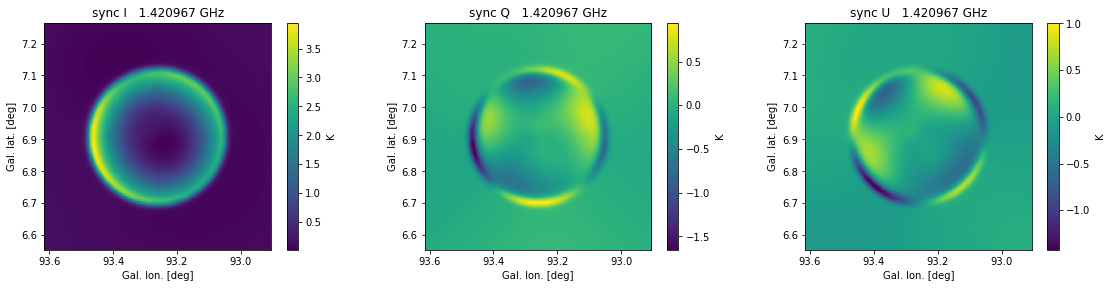

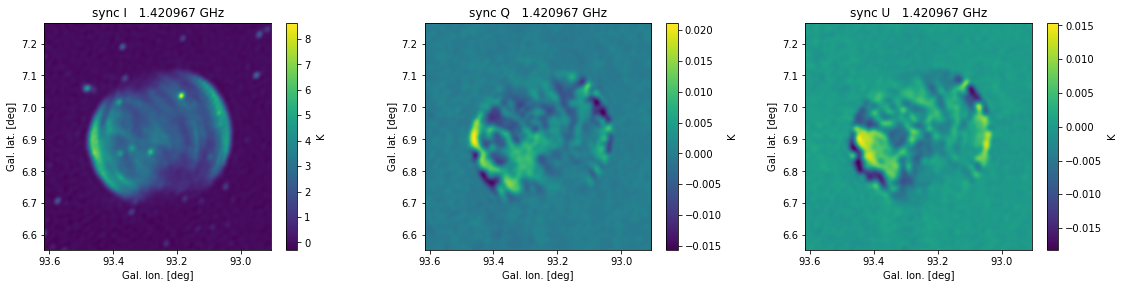



------------------------------ 
 CK_m0_field 
------------------------------
B: 0.22811839541172463 uG
m: 0.0
z_shift: 0.0 pc
period: 86.18091517081744 pc
period_z: 219.99996323629196 pc
x_shift: 20.613928589971113 pc
y_shift: -69.99880378485021 pc
alpha: 8.404651716169106 deg
beta: -25.695351745513634 deg
gamma: 3.9323427451082438 deg


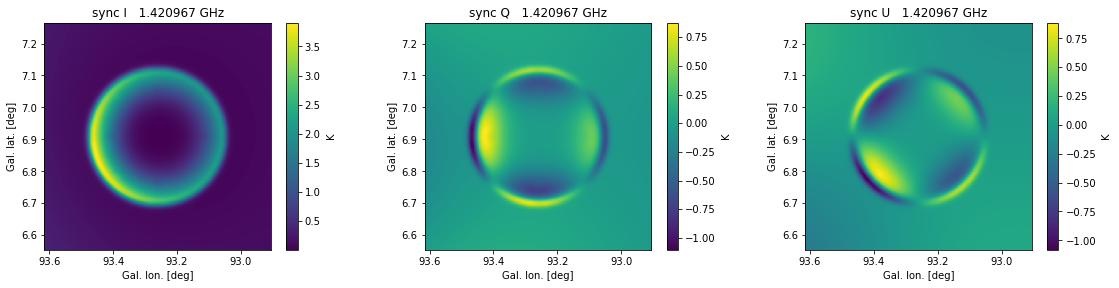

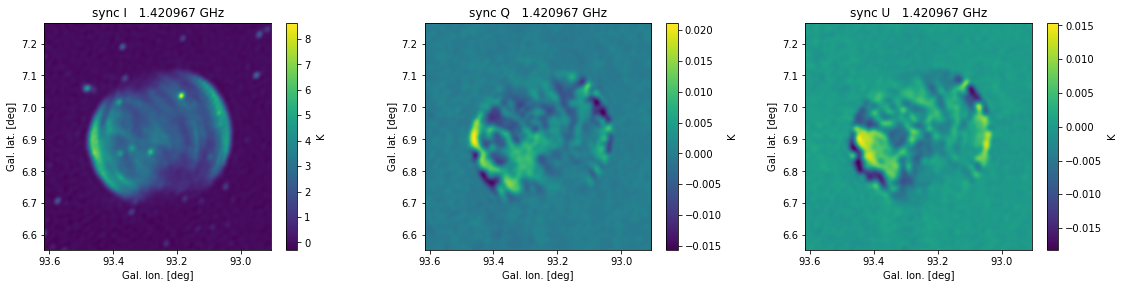



------------------------------ 
 CK_m1_field 
------------------------------
B: 0.16037137994729003 uG
m: 1.0
z_shift: 0.0 pc
period: 66.54662148564596 pc
period_z: 106.34580083859966 pc
x_shift: -17.964881299796488 pc
y_shift: -10.735885712847063 pc
alpha: -0.5763733487522944 deg
beta: -9.28701837217036 deg
gamma: 75.10665292184741 deg


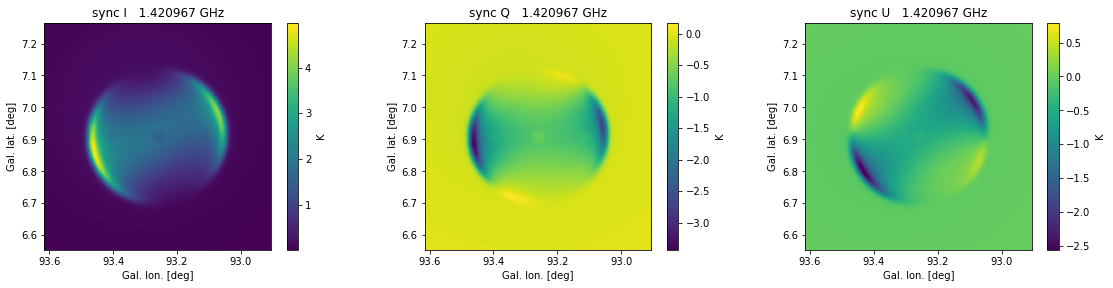

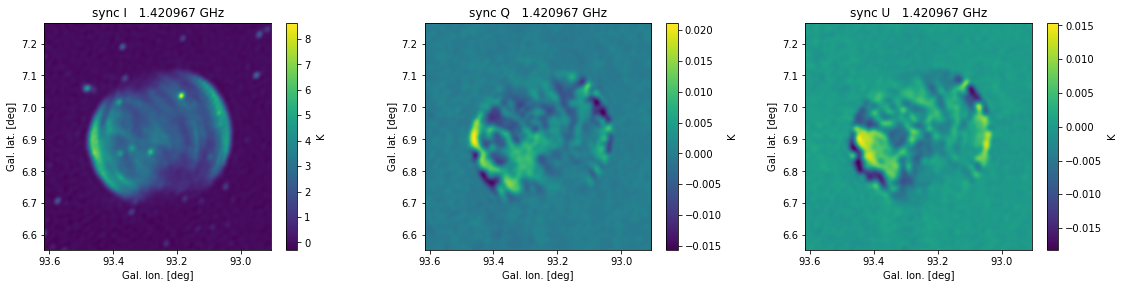

In [3]:
for name in runs_list:
    pipeline = runs[name]
    if pipeline._MAP_model is None:
        print('Skipping', name)
        continue
        
    print('\n\n'+'-'*30,'\n',name,'\n'+'-'*30)
    for p,v in pipeline.MAP_model[0].parameters.items():
        print(p+':',v)
    plt.figure(figsize=(16,4))
    pipeline.MAP_simulation.show()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16,4))
    pipeline.likelihood.measurement_dict.show()
    plt.tight_layout()
    plt.show()